##Diccionario de Datos

- age: Edad del cliente.
- job: Tipo de trabajo del cliente.
- marital: Estado civil del cliente.
- education: Nivel educativo del cliente.
- default: ¿Tiene crédito en incumplimiento?
- balance: Balance promedio anual.
- housing: ¿Tiene préstamo de vivienda?
- loan: ¿Tiene préstamo personal?
- contact: Tipo de contacto de comunicación.
- day: Último día de contacto del mes.
- month: Último mes de contacto del año.
- duration: Duración de la última llamada de contacto, en segundos.
- campaign: Número de contactos realizados durante esta campaña.
- pdays: Número de días desde el último contacto de una campaña anterior.
- previous: Número de contactos realizados antes de esta campaña.
- poutcome: Resultado de la campaña de marketing anterior.
- y: ¿Se suscribió el cliente a un depósito a plazo? (Variable objetivo)


##Bibliotecas necesarias y modelos

In [23]:
# Importacion de biblioteca
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

# Carga y Exploración Inicial de Datos:

In [2]:
# Carga de datos
df = pd.read_csv("/content/bank.csv", sep=";")

# Imprime las primeras columnas del df
print("Primeras 5 filas del DataFrame:")
display(df.head())

Primeras 5 filas del DataFrame:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
# Imprime los tipos de datos del df
print("Tipos de datos del DataFrame:")
display(df.dtypes)

# información general del dataset como el número de entradas, cantidad de columnas, nombres de columnas, tipos de datos y valores nulos.
print("Informacion general del DataFrame")
display(df.info())

# Identificar valores nulos
print(df.isnull().sum())

Tipos de datos del DataFrame:


,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


Informacion general del DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


None

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


#1- Limpieza de datos:

In [6]:
# Identificación y eliminación de duplicados
duplicados = df.duplicated().sum()
print(f"Cantidad de filas duplicadas: {duplicados}")

# Eliminación si existen duplicados
df = df.drop_duplicates()
print(f"Nueva forma del DataFrame después de eliminar duplicados: {df.shape}")

# Ya que no hay errores aparentes, verificamos si alguna conversión es necesaria:
# Ejemplo: convertir columnas categóricas explícitamente a 'category'
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].apply(lambda col: col.astype('category'))

Cantidad de filas duplicadas: 0
Nueva forma del DataFrame después de eliminar duplicados: (4521, 17)


In [7]:
# Corrección de inconsistencias en valores categóricos
for col in cat_cols:
    print(f"\nValores únicos en '{col}':")
    print(df[col].unique())

# Aquí se podra unificar manualmente si se detecta variaciones (ej. 'yes', 'Yes', 'YES' → 'yes')
# En este dataset no hay problemas evidentes de inconsistencias por mayúsculas/minúsculas

# Manejo de valores faltantes implícitos ('unknown')

# Conteo de valores 'unknown' por columna categórica
unknown_counts = {
    col: df[col].value_counts().get('unknown', 0)
    for col in cat_cols
    if 'unknown' in df[col].values
}

print("\nConteo de 'unknown' por columna categórica:")
for k, v in unknown_counts.items():
    print(f"{k}: {v}")

# Reemplazo de 'unknown' con la moda (frecuencia dominante), ejemplo para 'job'
for col in unknown_counts.keys():
    moda = df[col].mode()[0]
    df[col] = df[col].replace('unknown', moda)
    print(f"Valores 'unknown' en '{col}' reemplazados por la moda: '{moda}'")


Conteo de 'unknown' por columna categórica:


#2- Exploración de Datos:

In [8]:
# Estadísticas descriptivas básicas
print("Resumen estadístico de variables numéricas:")
display(df.describe())

# Cálculo adicional: moda
print("Moda por columna numérica:")
for col in df.select_dtypes(include='number').columns:
    print(f"{col}: {df[col].mode()[0]}")

Resumen estadístico de variables numéricas:


,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


Moda por columna numérica:
age: 34
balance: 0
day: 20
duration: 123
campaign: 1
pdays: -1
previous: 0


##Visualizaciones Univariadas

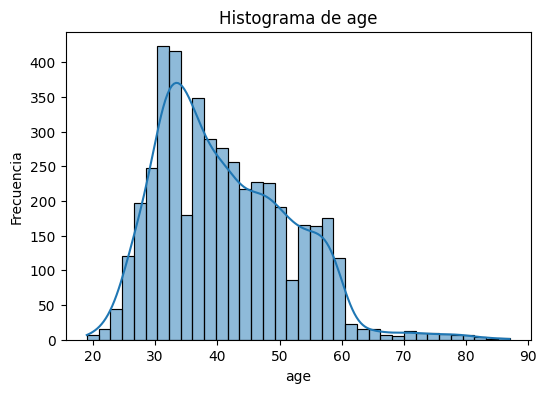

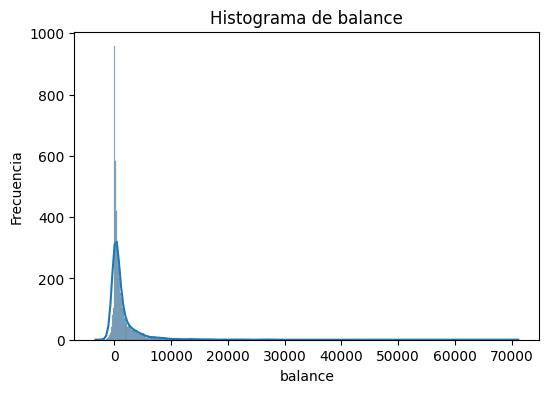

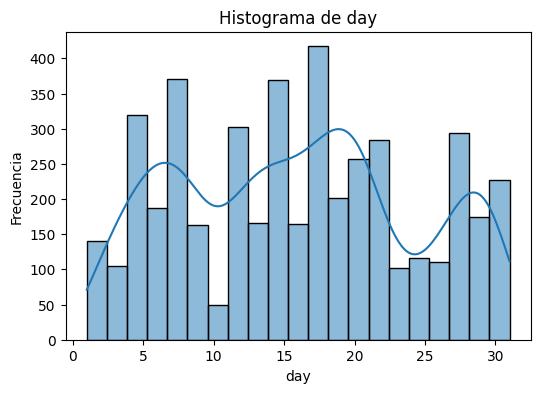

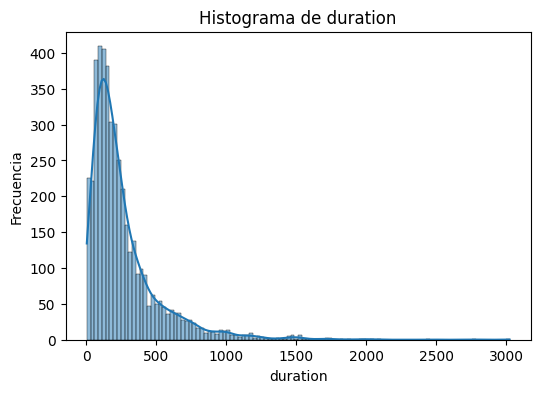

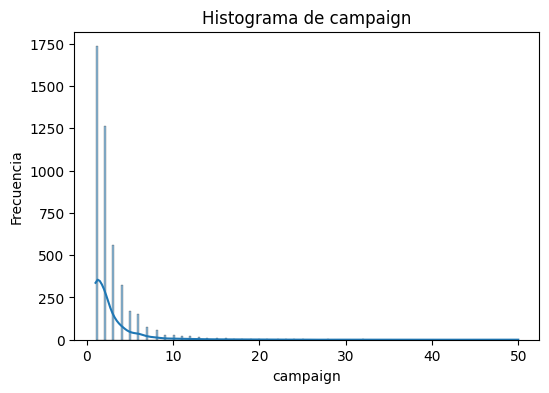

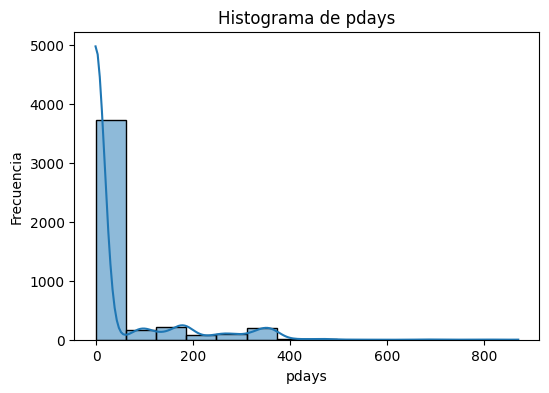

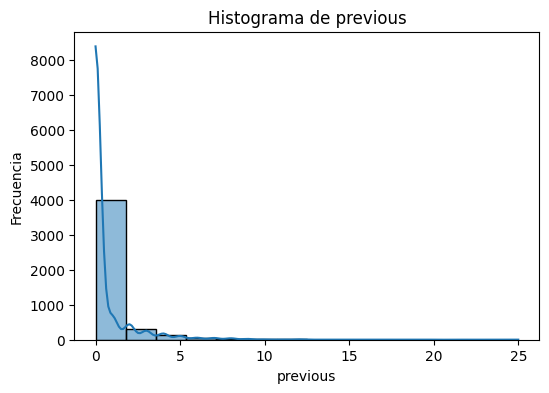

In [10]:
# Histograma de variables numéricas
num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Histograma de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

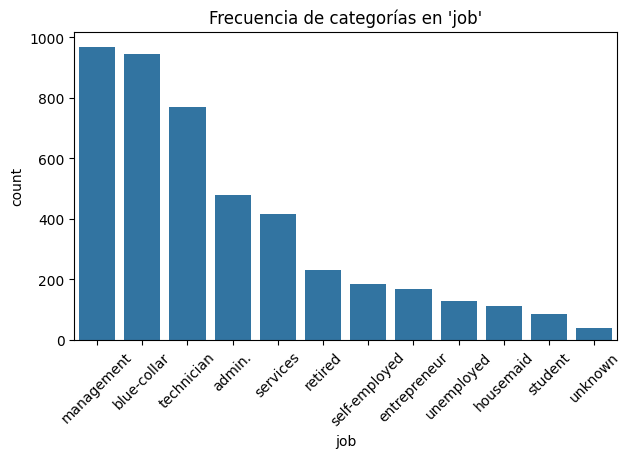

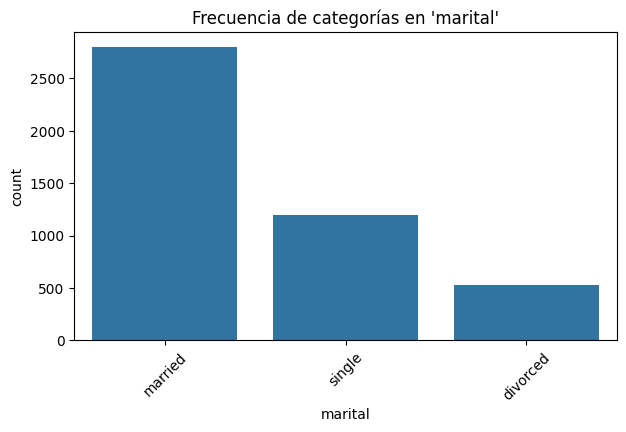

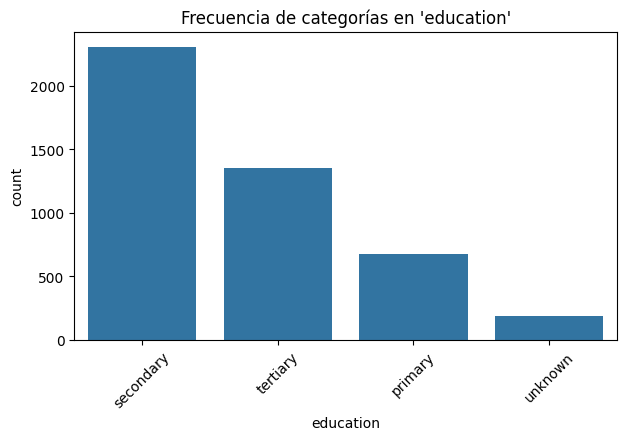

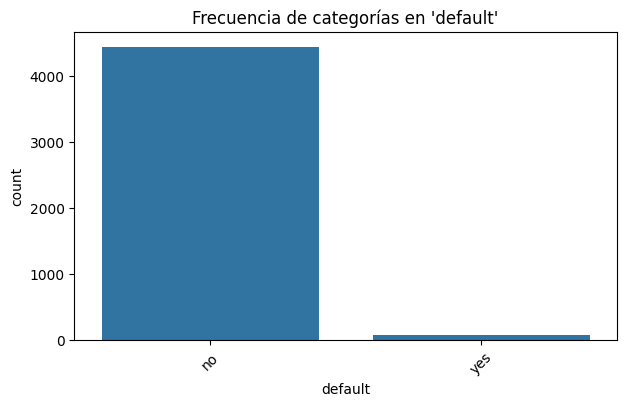

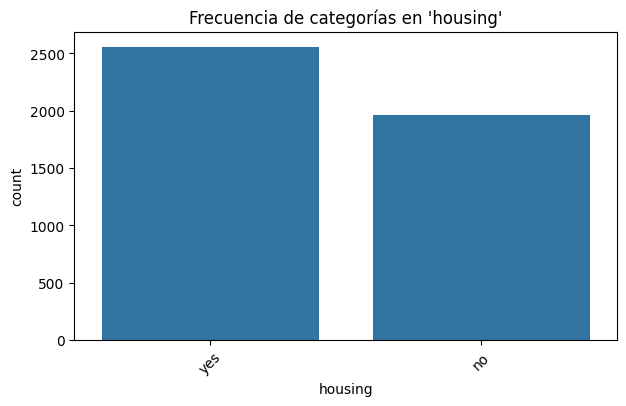

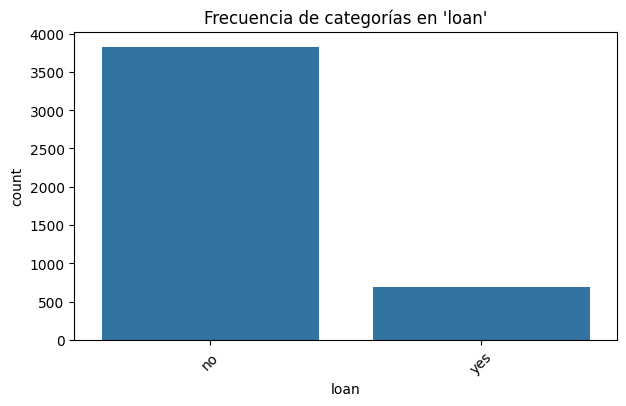

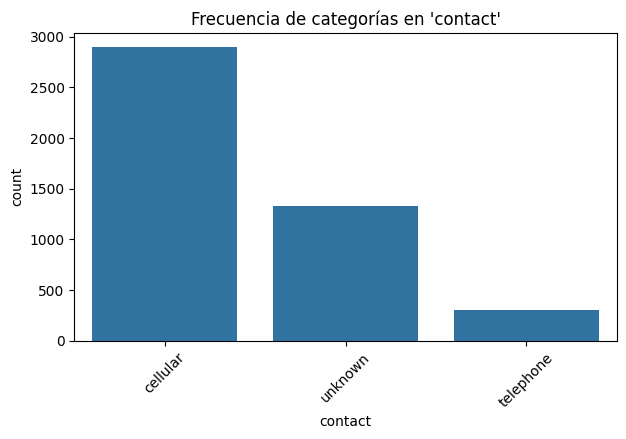

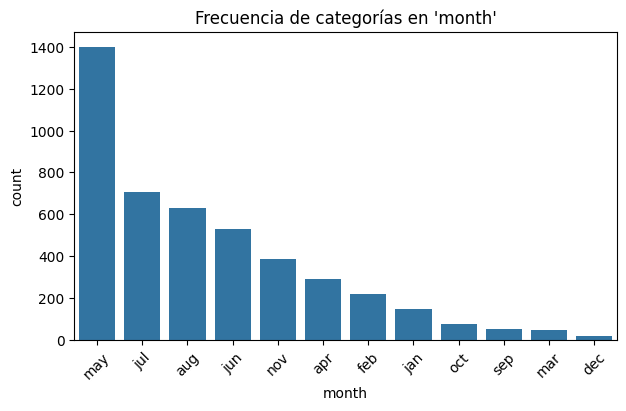

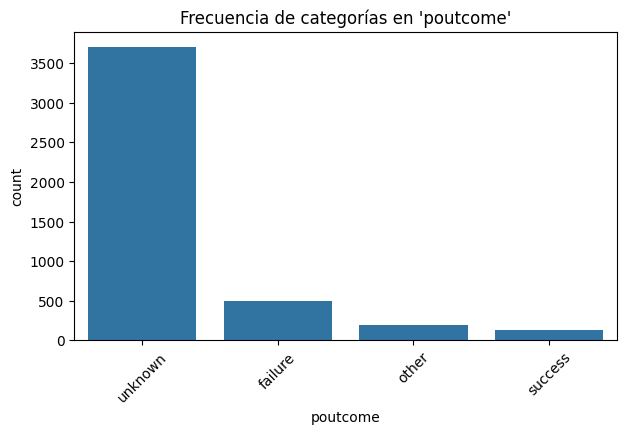

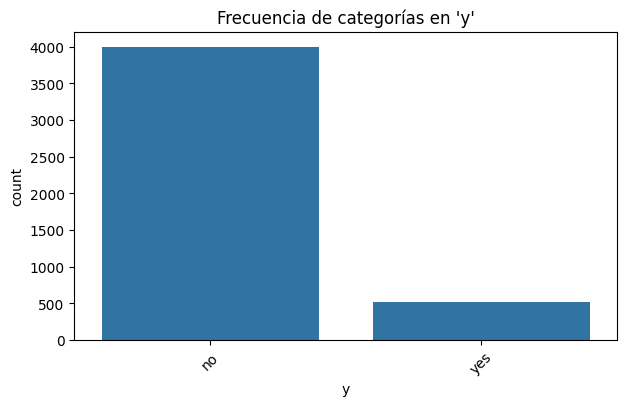

In [11]:
# Gráficos de barra para categóricas
cat_cols = df.select_dtypes(include='category').columns

for col in cat_cols:
    plt.figure(figsize=(7, 4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Frecuencia de categorías en '{col}'")
    plt.xticks(rotation=45)
    plt.show()

##Visualizaciones Multivariadas

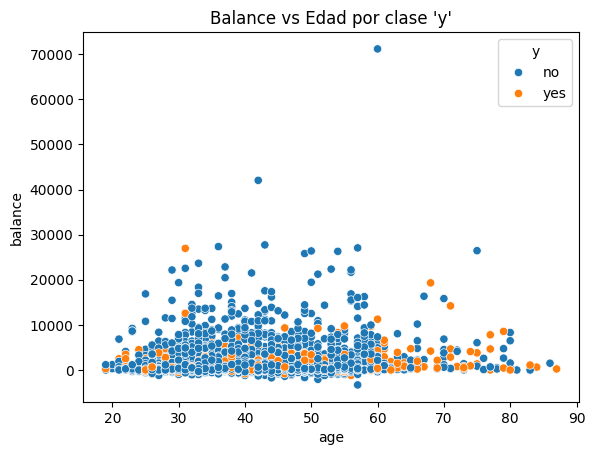

In [14]:
# Diagrama de dispersión: balance vs age, coloreado por y
sns.scatterplot(data=df, x='age', y='balance', hue='y')
plt.title("Balance vs Edad por clase 'y'")
plt.show()

##Observaciones de Diagrama de dispersión:
Se observa claramente cómo la mayoría de los clientes tienen balances por debajo de 20.000, mientras que los casos positivos (suscribieron a depósito) se concentran en distintos rangos de edad, aunque con menor densidad.


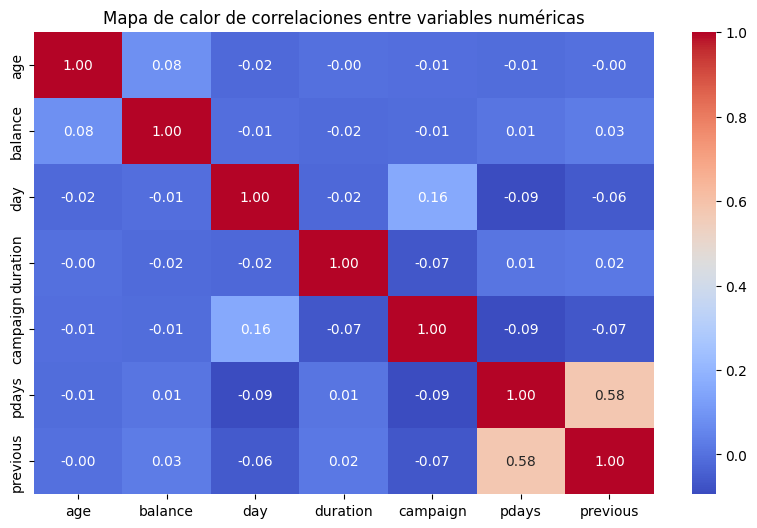

In [15]:
# Mapa de calor de correlaciones
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de calor de correlaciones entre variables numéricas")
plt.show()

##Observaciones de Mapa de calor de correlaciones:

- Correlaciones bajas en general: La mayoría de las variables tienen correlaciones débiles (cercanas a 0), lo que sugiere que no hay redundancia evidente entre ellas. Buen punto para justificar mantenerlas en el modelo.

- Fuerte correlación entre pdays y previous (0.58):

 - Esto indica que clientes contactados previamente tienden a tener valores altos en pdays.

- duration presenta correlaciones negativas leves con campaign (-0.07), lo cual es interesante porque sugiere que más contactos no implican necesariamente llamadas más largas.

- La variable day muestra correlaciones débiles con todas, excepto con campaign (0.16).

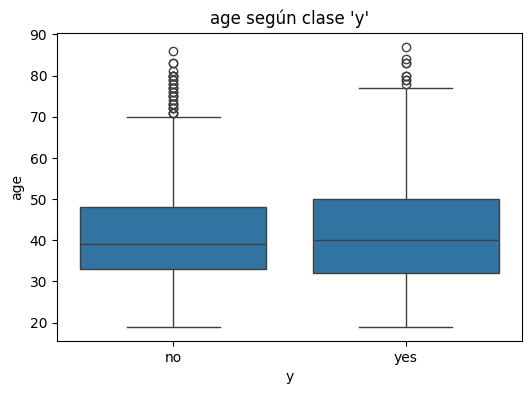

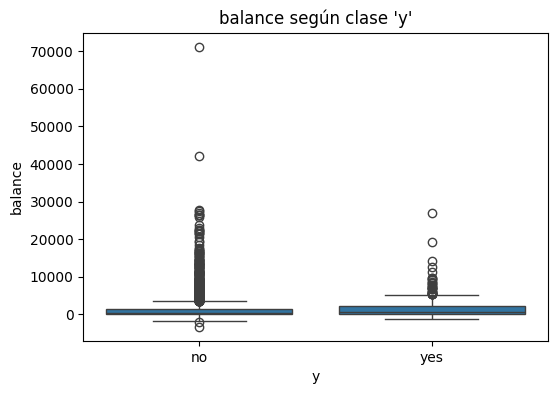

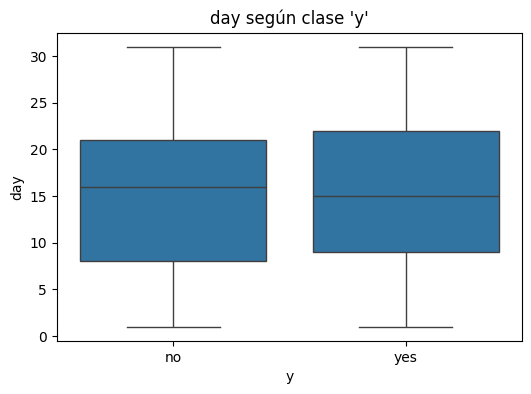

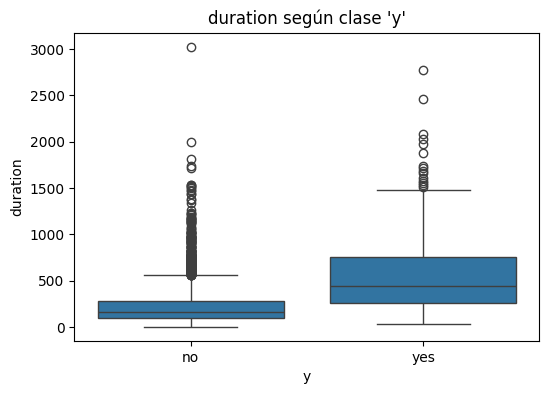

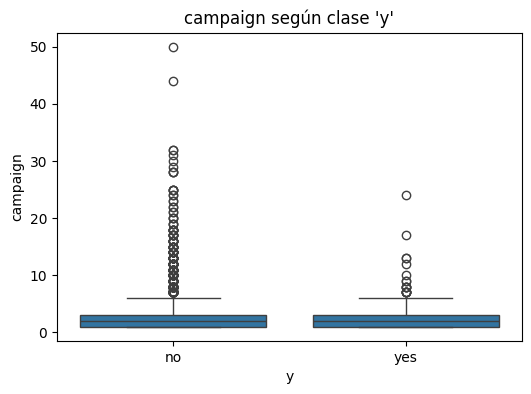

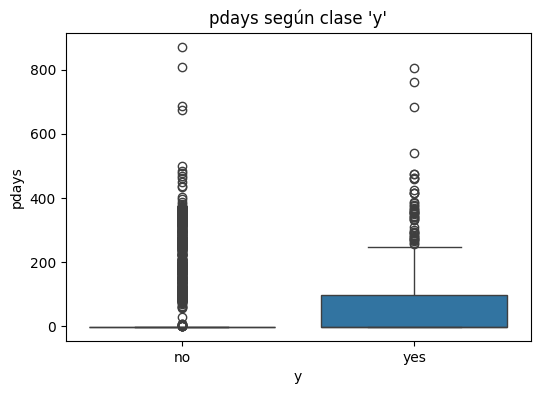

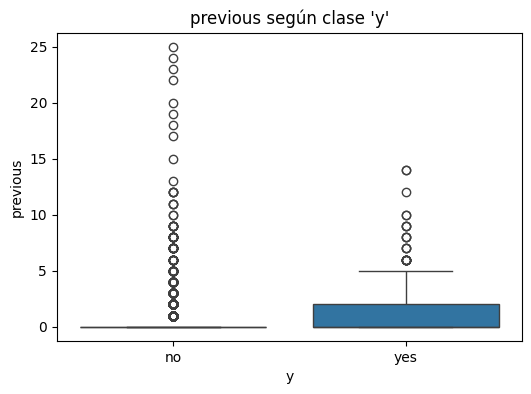

In [13]:
# Boxplots de variables numéricas según 'y'
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='y', y=col, data=df)
    plt.title(f"{col} según clase 'y'")
    plt.show()

##Observaciones de los siguientes Boxplots, balance, campaign y pdays

**balance según clase 'y'**:

- Distribución similar en mediana entre las clases 'no' y 'yes', lo cual sugiere que el balance no es un discriminador fuerte por sí solo.

- Presencia abundante de outliers en ambas clases, especialmente hacia la parte superior del rango (hasta ~70.000), lo que indica:

 - Gran variabilidad en balances personales de los clientes.

 - Posibles casos extremos que convendría revisar individualmente si afectan las métricas o desvían la media.

- La asimetría vertical en la clase 'no' podría estar relacionada con perfiles que tienen altos saldos pero no contratan el depósito.

**campaign según clase 'y'**:

- Distribución muy sesgada hacia la izquierda: La mayoría de los clientes fueron contactados solo 1 o 2 veces, en ambas clases 'yes' y 'no'.

- Clase 'yes' con mediana ligeramente inferior a la de 'no', lo que sugiere que los clientes que suscribieron al depósito tienden a necesitar menos intentos.

- Outliers extremos hasta 50 campañas, lo que podría representar clientes con seguimientos excesivos pero sin garantía de conversión.

- Caja más compacta en la clase 'yes': Esto refleja posiblemente una eficiencia mayor en campañas exitosas (menos dispersión en contactos)

**pdays según clase 'y'**:

- Clase 'no' extremadamente sesgada hacia valores bajos de pdays, con mayoría concentrada cerca de 0:

 - Esto indica que la mayoría de los clientes que no suscribieron al depósito no habían sido contactados recientemente.

 - También podría sugerir que una parte del público fue contactada por primera vez en esta campaña, y no antes.

- Clase 'yes' con distribución más amplia, mediana cerca de 200 y algunos valores altos:

 - Estos clientes fueron contactados con mayor antigüedad desde el último intento.

 - Puede reflejar una persistencia en el seguimiento con clientes que respondieron positivamente.

Se observan varios outliers en ambos grupos, lo que puede reflejar casos atípicos por estrategia o historial bancario.

#3- Implementación de Modelos:

In [19]:
# Separación de variable objetivo e independientes
y = df['y']
X = df.drop(columns='y')

# Codificación One-Hot (elimina una columna para evitar multicolinealidad)
X_encoded = pd.get_dummies(X, drop_first=True)

# División estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# Inicialización de modelos
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Entrenamiento
dt_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Predicciones
y_pred_dt = dt_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)

##Evaluación con métricas clave
Agregamos classification_report y formateamos los resultados para claridad:

In [21]:
# Evaluación del Árbol
print("Árbol de Decisión")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt, digits=4))

# Evaluación del SVM
print("SVM RBF")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm, digits=4))

Árbol de Decisión
Accuracy: 0.8917127071823204
              precision    recall  f1-score   support

          no     0.9150    0.9675    0.9405       801
         yes     0.5517    0.3077    0.3951       104

    accuracy                         0.8917       905
   macro avg     0.7334    0.6376    0.6678       905
weighted avg     0.8732    0.8917    0.8778       905

SVM RBF
Accuracy: 0.8850828729281768
              precision    recall  f1-score   support

          no     0.8851    1.0000    0.9390       801
         yes     0.0000    0.0000    0.0000       104

    accuracy                         0.8851       905
   macro avg     0.4425    0.5000    0.4695       905
weighted avg     0.7834    0.8851    0.8311       905



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


El SVM tiene muy buen rendimiento para la clase mayoritaria (no), pero ignora completamente la clase minoritaria (yes). Esto es típico en casos de desbalance de clases, donde los SVM sin ajuste tienden a priorizar la clase dominante.

- Árbol de decisión ofrece:

 - Mayor sensibilidad a la clase yes

 - Métricas razonables incluso en condiciones de desbalance

 - Interpretabilidad y posibilidad de visualizar reglas

- SVM con kernel RBF:

 - Alta precisión y recall en clase no

 - Completamente ciego a la clase yes → no ayuda si tu problema requiere detectar positivos

##Comparación visual de rendimiento

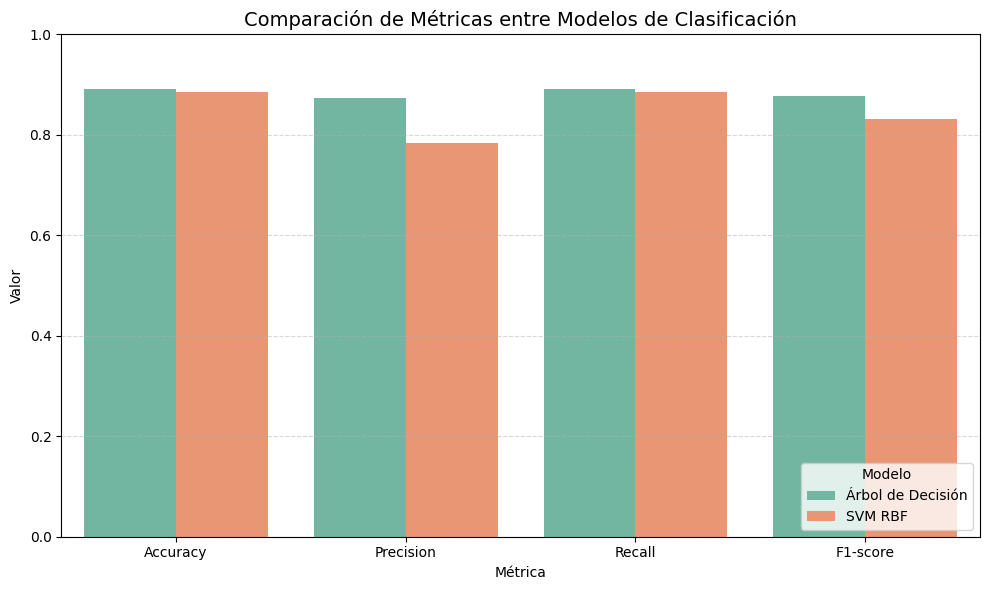

In [25]:
# DataFrame con resultados
comparison_df = pd.DataFrame({
    'Modelo': ['Árbol de Decisión', 'SVM RBF'],
    'Accuracy': [0.891713, 0.885083],
    'Precision': [0.873248, 0.783372],
    'Recall': [0.891713, 0.885083],
    'F1-score': [0.877850, 0.831127]
})

# Convertir a formato largo (long-form) para usar en seaborn
comparison_melted = comparison_df.melt(id_vars='Modelo', var_name='Métrica', value_name='Valor')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=comparison_melted, x='Métrica', y='Valor', hue='Modelo', palette='Set2')

# Estética
plt.title('Comparación de Métricas entre Modelos de Clasificación', fontsize=14)
plt.ylim(0.0, 1.0)
plt.ylabel('Valor')
plt.xlabel('Métrica')
plt.legend(title='Modelo', loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Ambos tienen un rendimiento alto en accuracy, el Árbol de Decisión supera al SVM RBF en todas las métricas de forma consistente. Esto refuerza lo que vimos en los classification reports, donde el SVM ignoraba por completo la clase minoritaria yes.


In [24]:
# Métricas clave
metrics = {
    'Modelo': ['Árbol de Decisión', 'SVM RBF'],
    'Accuracy': [accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_svm)],
    'Precision': [precision_score(y_test, y_pred_dt, average='weighted'), precision_score(y_test, y_pred_svm, average='weighted')],
    'Recall': [recall_score(y_test, y_pred_dt, average='weighted'), recall_score(y_test, y_pred_svm, average='weighted')],
    'F1-score': [f1_score(y_test, y_pred_dt, average='weighted'), f1_score(y_test, y_pred_svm, average='weighted')]
}

comparison_df = pd.DataFrame(metrics)
print(comparison_df)

              Modelo  Accuracy  Precision    Recall  F1-score
0  Árbol de Decisión  0.891713   0.873248  0.891713  0.877850
1            SVM RBF  0.885083   0.783372  0.885083  0.831127


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#Conclusión
En este proyecto se compararon dos modelos de clasificación supervisada, Árbol de Decisión y SVM con kernel RBF, aplicados a un dataset con clases desbalanceadas. Tras entrenar y evaluar ambos modelos, se observó lo siguiente:

- El Árbol de Decisión mostró un rendimiento más equilibrado entre precisión, recall y F1-score, siendo capaz de detectar ejemplos positivos (clase yes) con una sensibilidad moderada, incluso sin técnicas de resampling.

- El SVM RBF, aunque alcanzó una alta accuracy global, falló por completo en capturar la clase minoritaria, lo cual lo hace inapropiado en su configuración actual para tareas donde los falsos negativos tienen alto costo.

Gracias al enfoque visual y comparativo, se evidencia que el Árbol de Decisión es el más adecuado para este conjunto de datos en términos de cobertura y robustez, especialmente cuando el objetivo es identificar correctamente ambas clases.

##Conclusión sobre el Bank Marketing Dataset
Con más de 40.000 registros, el objetivo principal es predecir si un cliente aceptará o no suscribir un depósito a plazo (y = yes/no)2.

- Desbalance de clases: La mayoría de los clientes no aceptan la oferta (no), lo que plantea un reto para los modelos de clasificación, especialmente aquellos sensibles al equilibrio de clases como SVM.

- Variables relevantes: Atributos como el tipo de contacto (contact), mes de contacto (month), duración de la llamada (duration) y estado laboral (job) muestran fuerte correlación con la decisión del cliente.

Este dataset no solo permite entrenar modelos predictivos, sino también extraer insights estratégicos para futuras campañas, como identificar perfiles con mayor probabilidad de conversión y optimizar recursos humanos en llamadas.